In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import networkx as nx
import scipy.linalg as la

In [104]:
def weighted_sums(F, L, i, j):
    s = 0;
    for k in range(i, j):
        s = s + F[k] * L[k];
    return s

In [197]:
from networkx.algorithms import bipartite
from networkx.algorithms.bipartite.generators import configuration_model
d = 20;
e = 16;
N = 100;
aseq = d * np.ones(int(N))
bseq = e * np.ones(int(N*d/e))
G = configuration_model(aseq.astype(int), bseq.astype(int), create_using=nx.Graph(), seed=None)

#nx.draw(B, with_labels=True)

X, Y = bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

J = np.zeros((N, max(Y)-N+1))
for i in range(N,max(Y)+1):
    temp = [n for n in G[i]]
    for j in range(len(G[i])):
        J[temp[j]][i - N] = 1
print(J)

#nx.draw(G, pos=pos, with_labels=True)
#plt.show()
#print(nx.adjacency_matrix(B, nodelist=None, weight='weight'))

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [198]:
import itertools
H = nx.MultiGraph()
for i in range(max(Y)-N+1):
    Q = list(itertools.combinations(np.where(J[:,i] == 1)[0], 2))
    H.add_edges_from(Q)
A = nx.adjacency_matrix(H)
#print(A.todense())
HI = nx.from_numpy_matrix(A.todense())
k = 2*nx.number_of_edges(HI)/len(HI)
print(2*nx.number_of_edges(HI)/len(HI))
B = A.todense()
W = np.unique(np.array(B))

94.52


In [199]:
tau = 0.1
gamma = 0.5
No_of_Iterations = 10
y0 = 10

In [200]:
def cons(y, t):
    I = y[0]
    dIdt = tau * (N - I) * d * ((e-1)/N)*I - gamma * I
    #dIdt = tau * (500 - I) * 16 * ((20-1)/500)*I - gamma * I
    return  dIdt

t = np.linspace(0, 2, 200)
y_Simon = odeint(cons, y0, t)
#print(y_Simon)
#plt.plot(y_Simon)
#plt.plot(y_pairs[:,1])
#plt.plot(I)
#plt.plot(y)

In [201]:
#closing at the level of pairs


def deriv(x, t):
    S, I = x
    dSdt = -tau * S * I + gamma * I
    dIdt = tau * S * I - gamma * I
    return dSdt, dIdt

S0, I0 = N-y0, y0
x0 = S0, I0
y_pairs = odeint(deriv, x0, t)
#print(y_pairs)
#plt.plot(ret[:,1])

In [202]:
ti = 200;
S, I = np.zeros(ti), np.zeros(ti)
SI, II, SS = np.zeros((len(W),ti)), np.zeros((len(W),ti)), np.zeros((len(W),ti))
S[0] = N - y0
I[0] = y0

x = np.zeros(N)
x[0] = 1
x[1] = 1
x[2] = 1
x[3] = 1
x[4] = 1
x[5] = 1
x[6] = 1
x[7] = 1
x[8] = 1
x[9] = 1

for i in range(N):
    for j in range(N):
        if i != j:
            if x[i] == 0 and x[j] == 0:
                SS[B[i,j],0] += 1;
            if (x[i] == 0 and x[j] == 1) or (x[i] == 1 and x[j] == 0):
                SI[B[i,j],0] += 1;
            if x[i] == 1 and x[j] == 1:
                II[B[i,j],0] += 1
                
for t in range(ti-1):
    S[t + 1] = S[t] + (gamma * I[t] - tau * weighted_sums(W, SI[:,t], 0, len(W))) * 0.01
    I[t + 1] = I[t] + (tau * weighted_sums(W, SI[:,t], 0, len(W)) - gamma * I[t]) * 0.01
    for m in range(len(W)):
        SI[m, t + 1] = SI[m, t] + (gamma * (II[m, t] - SI[m, t]) + tau * weighted_sums(W, ((k-1)/k*SS[m,t]/S[t])*SI[:,t]-((k-1)/k*SI[m,t]/S[t])*SI[:,t], 0, len(W))-tau*W[m]*SI[m,t])*0.01
        II[m, t + 1] = II[m, t] + (-2*gamma*II[m, t] + 2*tau*weighted_sums(W, ((k-1)/k*SI[m,t]/S[t])*SI[:,t], 0, len(W)) + 2*tau*W[m]*SI[m,t])*0.01
        SS[m, t + 1] = SS[m, t] + (2*gamma*SI[m, t] - 2*tau*weighted_sums(W, ((k-1)/k*SS[m,t]/S[t])*SI[:,t], 0, len(W)))*0.01                       

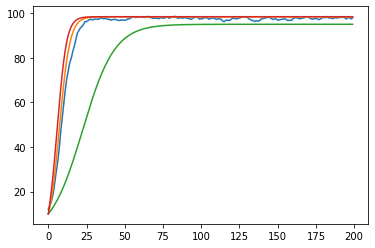

In [203]:
infected = np.zeros((200,No_of_Iterations))
#recovered = np.zeros(300)

for iteration in range(No_of_Iterations):
    x = np.zeros(len(X))
    #init_I = np.random.randint(N - 1, size=y0)
    #print(init_I)
    #x[init_I] = 1
    x[0] = 1
    x[1] = 1
    x[2] = 1
    x[3] = 1
    x[4] = 1
    x[5] = 1
    x[6] = 1
    x[7] = 1
    x[8] = 1
    x[9] = 1
    #print(iteration)
    for i in range(200):
        r = np.random.rand(N)
        #print(r)
        for j in range(len(X)):
            if x[j] == 0:
                s = 0
                for k in range(len(J[0])):
                    s = s + J[j][k] * np.matmul(x, J)[k]
                #print(1 - np.exp(-tau * s * 0.01))
                if r[j] <= 1 - np.exp(-tau * s * 0.01):
                    x[j] = 1
            if x[j] == 1:
                if r[j] <= 1 - np.exp(-gamma * 0.01):
                    x[j] = 0
        infected[i][iteration] = np.sum(x)
    #recovered[i] = np.sum(np.imag(x))
#plt.plot(infected)
#plt.plot(recovered)
plt.plot(np.mean(infected, axis=1))
plt.plot(y_Simon)
plt.plot(y_pairs[:,1])
plt.plot(I)

In [164]:
x = np.zeros(len(G))
x[3] = 1
x.dot(J)

ValueError: shapes (180,) and (100,80) not aligned: 180 (dim 0) != 100 (dim 0)

In [ ]:
np.matmul([2,2], [[3,4],[5,6]])

In [ ]:
import random 
def partition (list_in, n):
    random.shuffle(list_in)
    return [list_in[i::n] for i in range(n)]

In [ ]:
def diff_eqs(INP,t):  
    Y = np.zeros((3))
    V = INP    
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    return Y   # For odeint


In [ ]:
len(J[14])

In [ ]:
print(J)

In [ ]:
G = nx.barabasi_albert_graph(50,10)
A = list(nx.find_cliques(G))
J = np.zeros((len(G),len(A)))
for k in range(len(G)):
    for i in range(len(A)):
        for j in range(len(A[i])):
            #print(i, j, A[i][j])
            J[A[i][j]][i] = 1
print(J)